LAB 5 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import lognorm
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.preprocessing import StandardScaler

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("/Users/jesuspetit/Desktop/marketing_customer_analysis.csv")
dataset

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
#columns info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [4]:
dataset["Customer Lifetime Value"]

0         4809.216960
1         2228.525238
2        14947.917300
3        22332.439460
4         9025.067525
             ...     
10905    15563.369440
10906     5259.444853
10907    23893.304100
10908    11971.977650
10909     6857.519928
Name: Customer Lifetime Value, Length: 10910, dtype: float64

In [5]:
dataset.isna().sum()

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [6]:
dataset = dataset.dropna(axis=0)


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     4543 non-null   int64  
 1   Customer                       4543 non-null   object 
 2   State                          4543 non-null   object 
 3   Customer Lifetime Value        4543 non-null   float64
 4   Response                       4543 non-null   object 
 5   Coverage                       4543 non-null   object 
 6   Education                      4543 non-null   object 
 7   Effective To Date              4543 non-null   object 
 8   EmploymentStatus               4543 non-null   object 
 9   Gender                         4543 non-null   object 
 10  Income                         4543 non-null   int64  
 11  Location Code                  4543 non-null   object 
 12  Marital Status                 4543 non-null   

In [8]:
#columns title
dataset.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [9]:
#drop unnamed
dataset = dataset.drop('Unnamed: 0', axis=1)

In [10]:
#which are numericals
dataset.select_dtypes(exclude=['object']).columns.tolist() 

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [11]:
##dataframe called numerical
numerical = dataset[['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies','Total Claim Amount']].copy()
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
10,5154.764074,82730,127,13.0,31,0.0,1,442.521087
13,5454.587929,66334,69,25.0,25,0.0,4,331.200000
16,5326.677654,76717,66,26.0,10,0.0,6,300.528579
...,...,...,...,...,...,...,...,...
10902,3579.023825,28304,91,10.0,30,2.0,1,655.200000
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929


In [12]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        4543 non-null   float64
 1   Income                         4543 non-null   int64  
 2   Monthly Premium Auto           4543 non-null   int64  
 3   Months Since Last Claim        4543 non-null   float64
 4   Months Since Policy Inception  4543 non-null   int64  
 5   Number of Open Complaints      4543 non-null   float64
 6   Number of Policies             4543 non-null   int64  
 7   Total Claim Amount             4543 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 319.4 KB


In [13]:
#which are categoricals
dataset.select_dtypes(include=['object']).columns.tolist() 

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [14]:
##dataframe called categorical
categorical = dataset[['Customer','State','Response','Coverage','Education','Effective To Date','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size','Vehicle Type']].copy()
categorical 

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,HG93801,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,KR82385,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,FH51383,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
10903,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


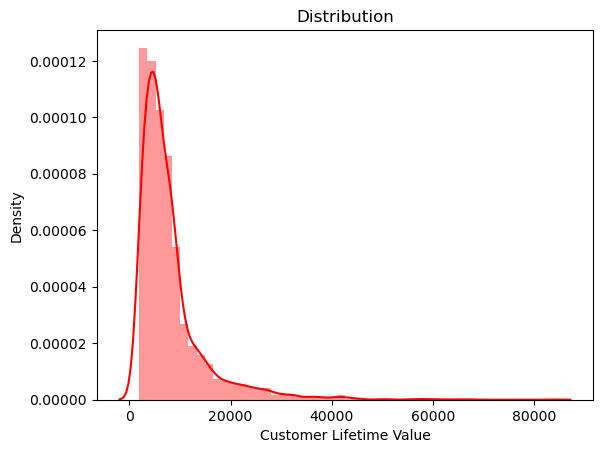

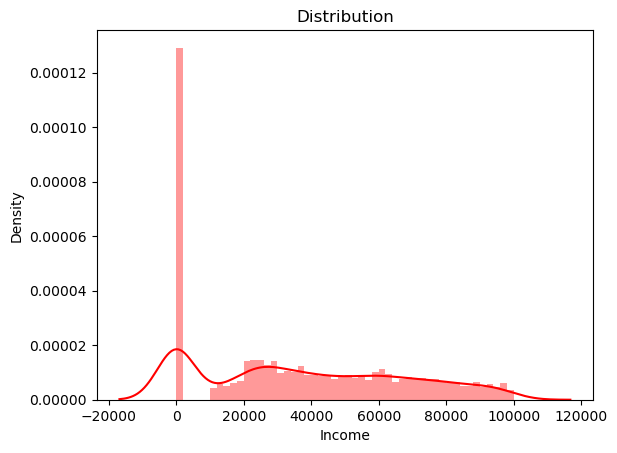

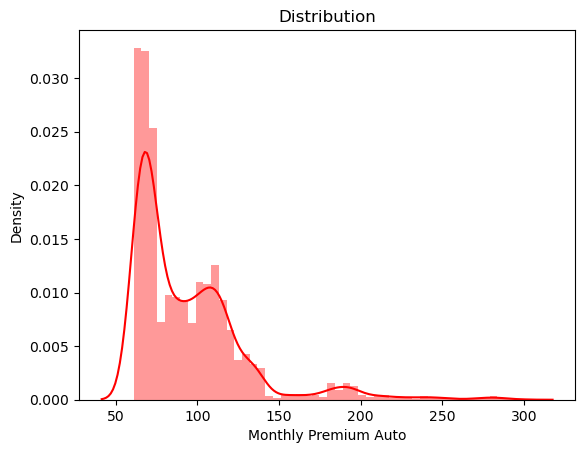

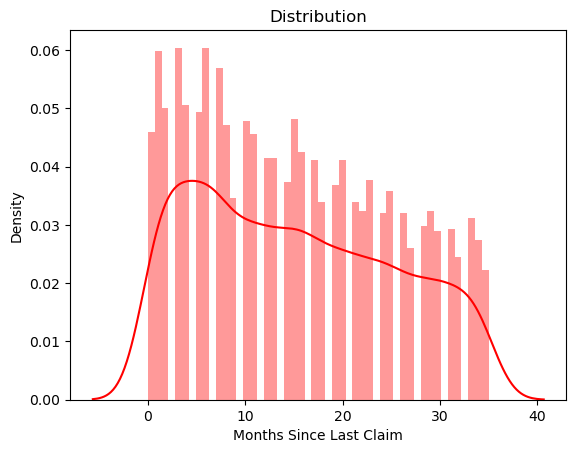

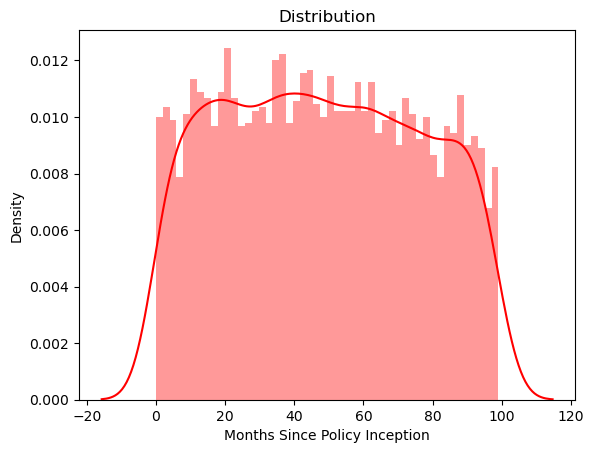

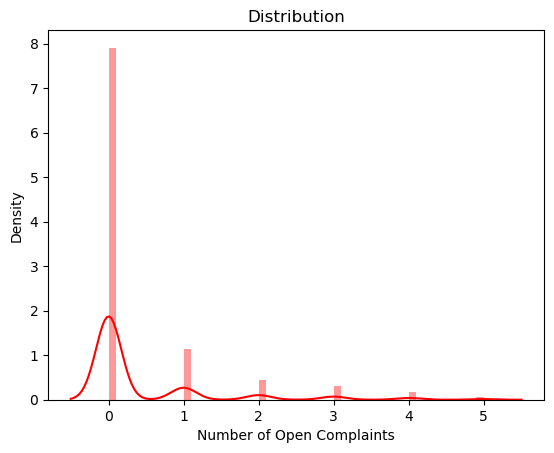

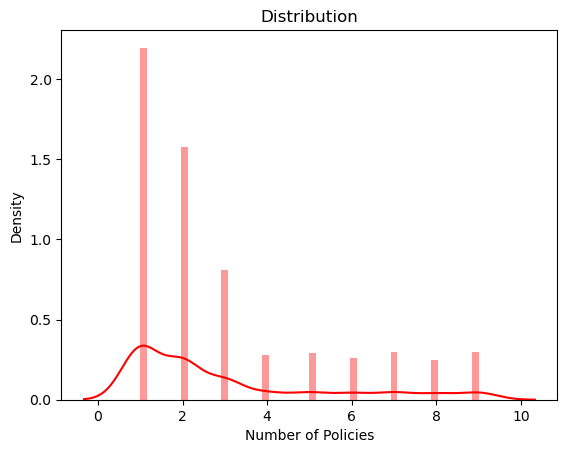

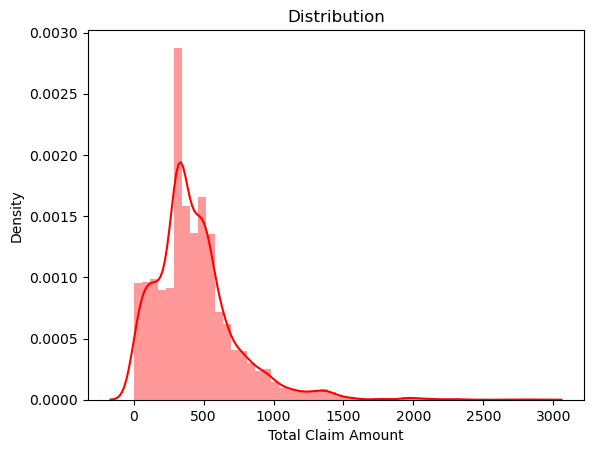

In [15]:
##Use seaborn library to construct distribution plots for the numerical variables
for col in numerical:
    sns.distplot(numerical[col],bins= 50, 
                   color = "red")
    plt.title("Distribution")
    plt.show()

array([[<AxesSubplot: title={'center': 'Customer Lifetime Value'}>,
        <AxesSubplot: title={'center': 'Income'}>,
        <AxesSubplot: title={'center': 'Monthly Premium Auto'}>],
       [<AxesSubplot: title={'center': 'Months Since Last Claim'}>,
        <AxesSubplot: title={'center': 'Months Since Policy Inception'}>,
        <AxesSubplot: title={'center': 'Number of Open Complaints'}>],
       [<AxesSubplot: title={'center': 'Number of Policies'}>,
        <AxesSubplot: title={'center': 'Total Claim Amount'}>,
        <AxesSubplot: >]], dtype=object)

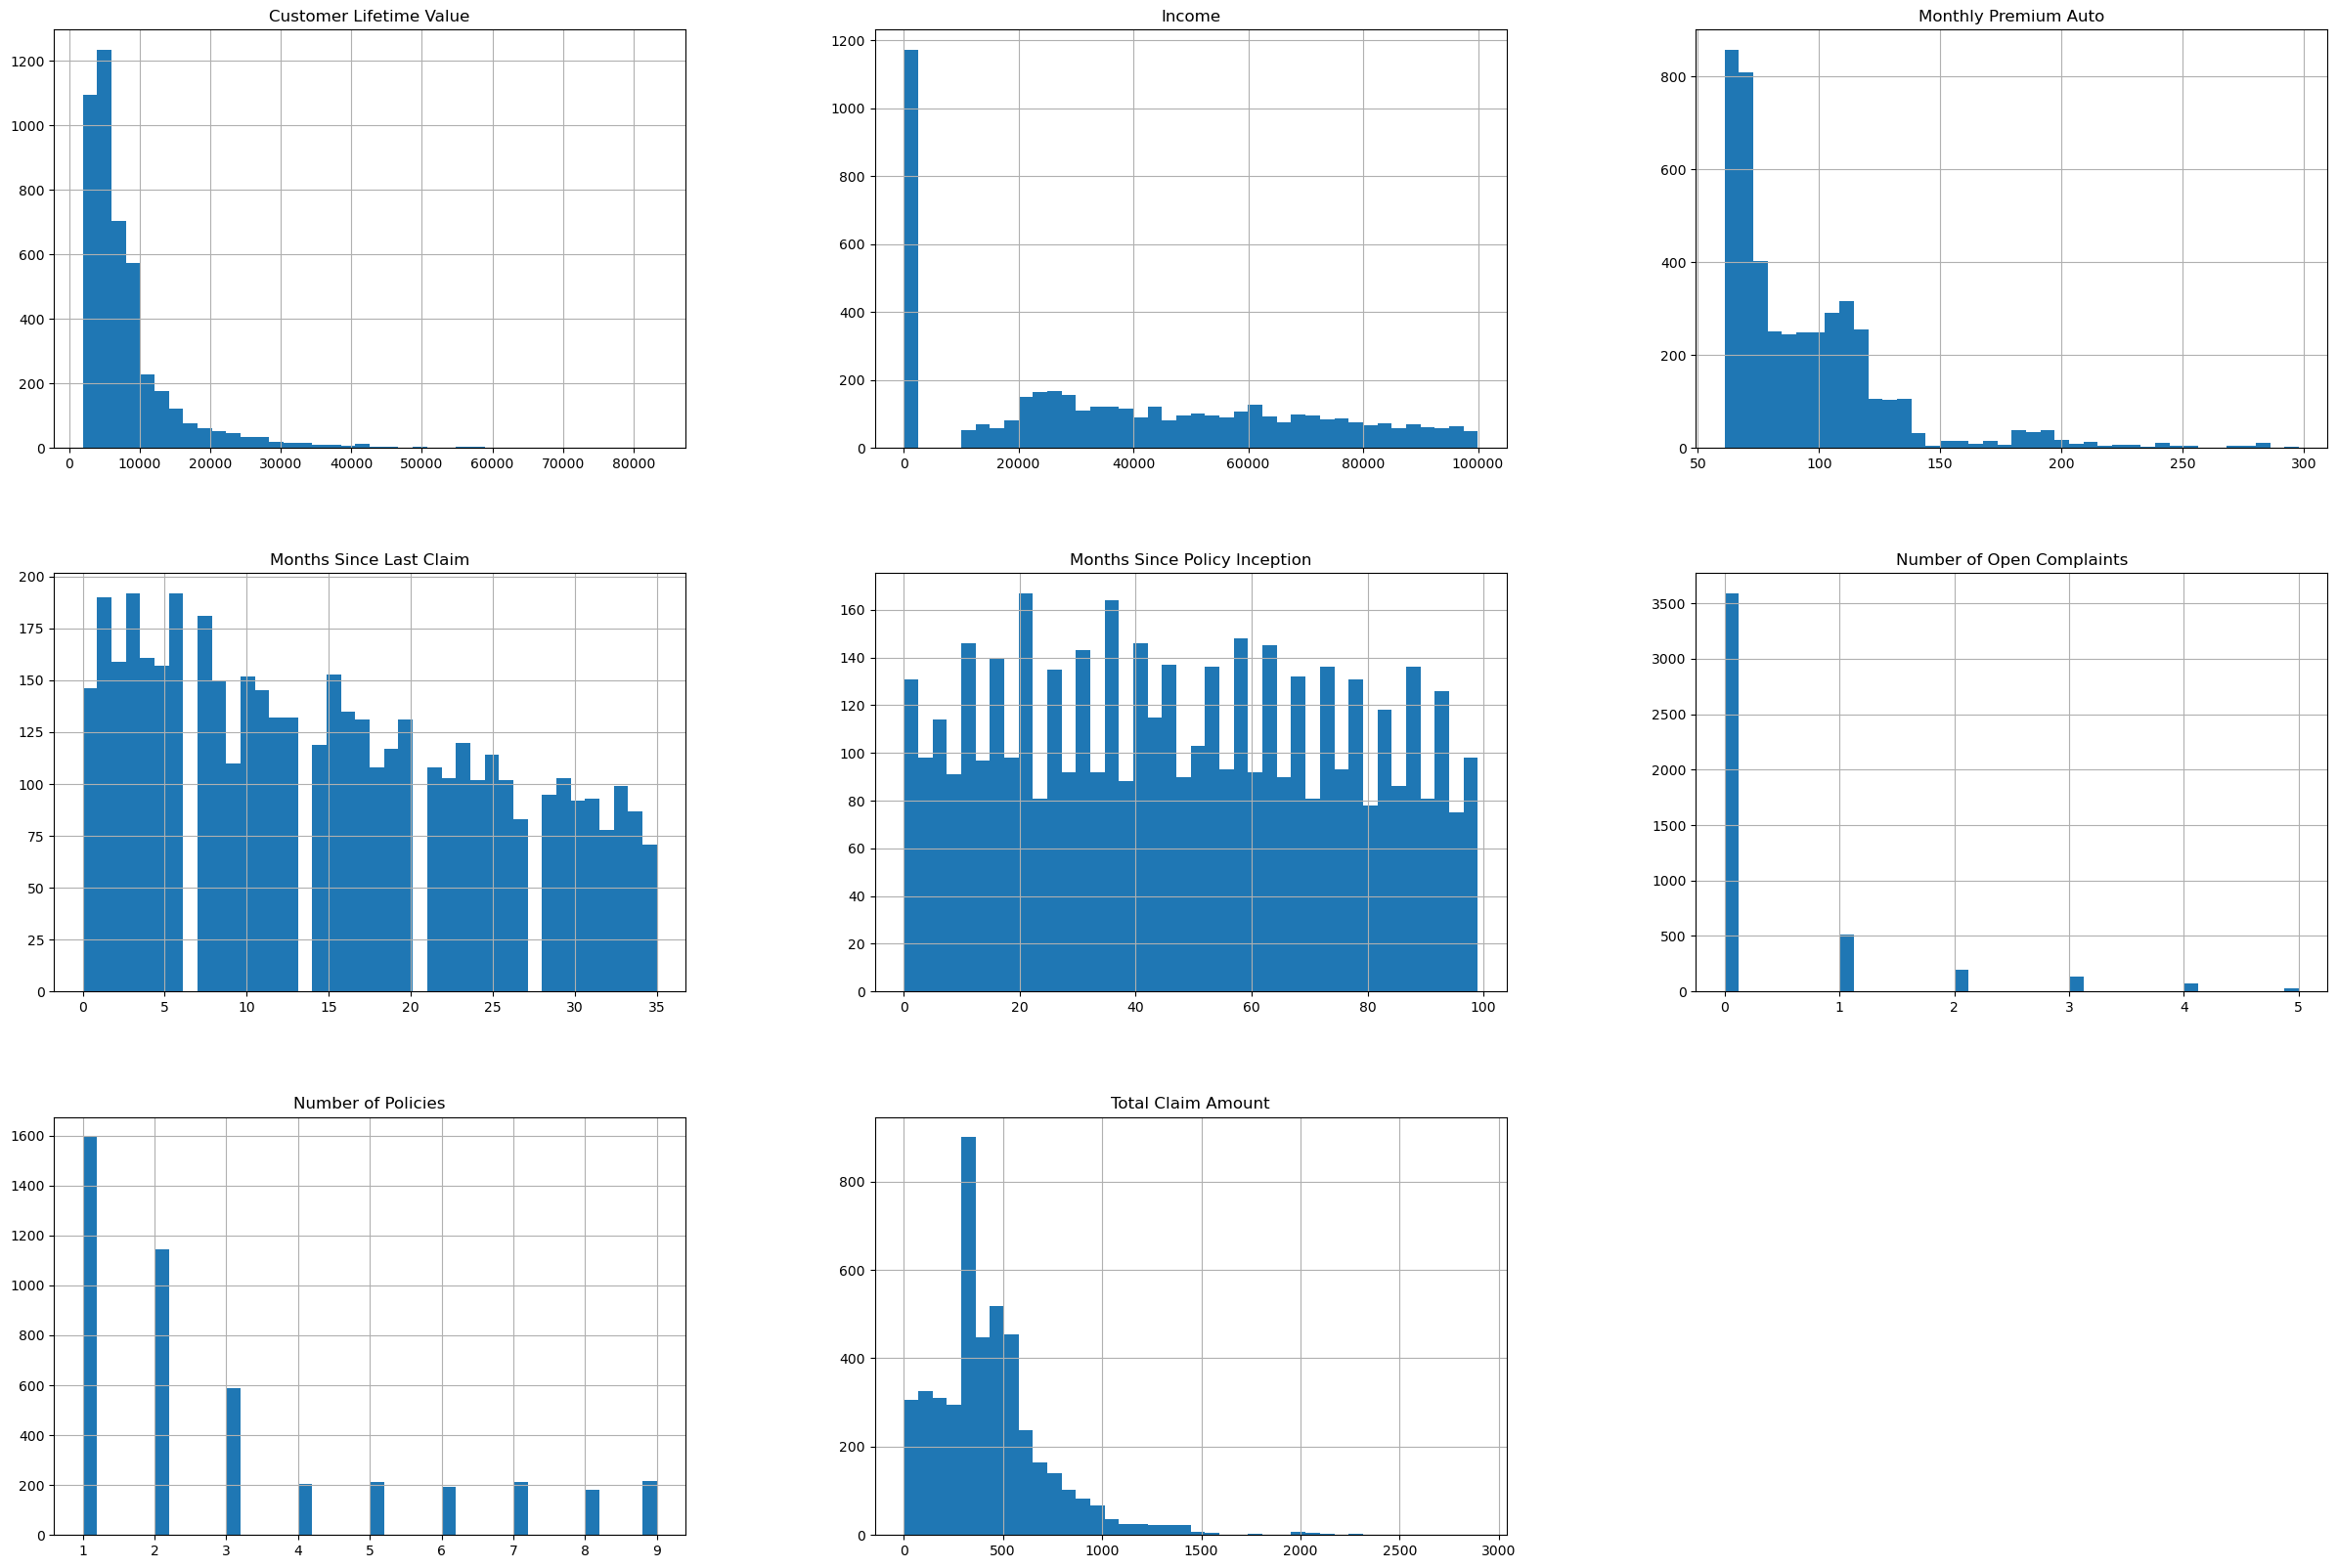

In [16]:
## Use Matplotlib to construct histograms
numerical.hist(bins=40, figsize=(30,20))

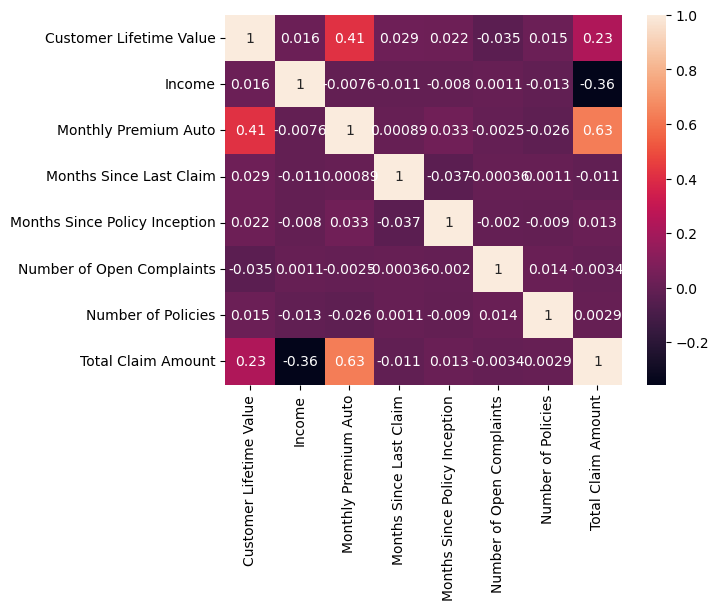

In [17]:
## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
correlations = numerical.corr()
sns_plot = sns.heatmap(correlations, annot = True)
figure = sns_plot.get_figure()
plt.show()

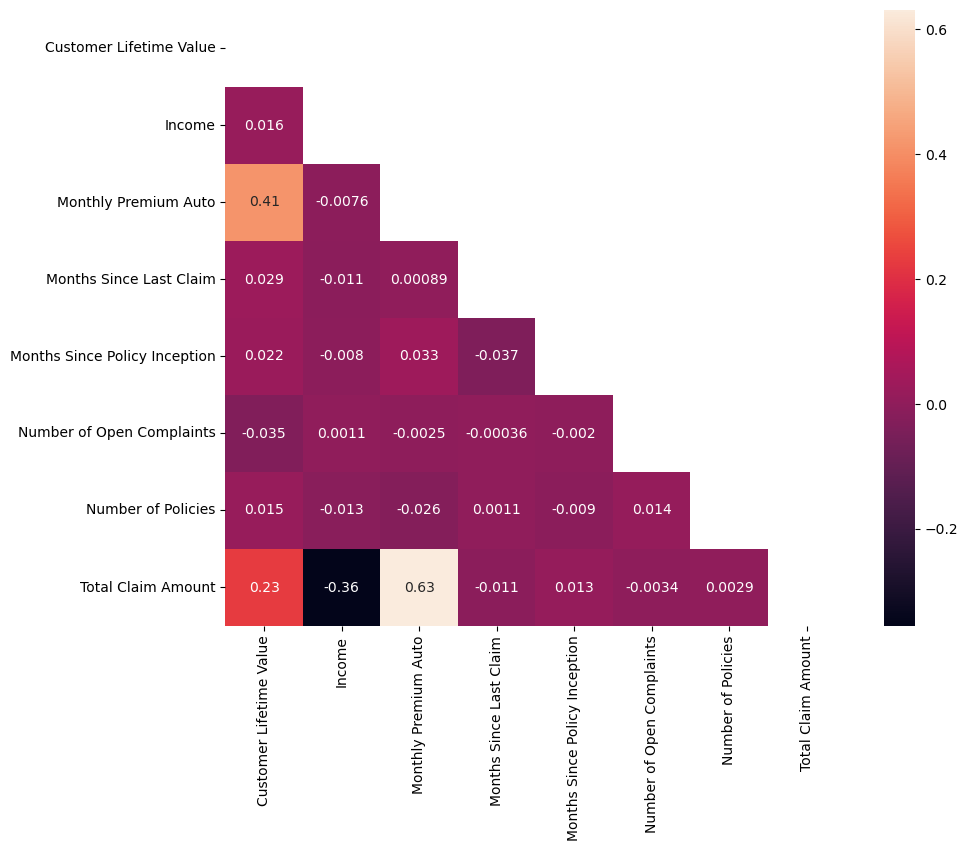

In [18]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
fog, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations, mask=mask, annot=True)
plt.show()

In [19]:
## Drop one of the two features that show a high correlation between them (greater than 0.9). 
### Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.
mask = (correlations["Total Claim Amount"] > 0.9)
correlations[mask]["Total Claim Amount"]

Total Claim Amount    1.0
Name: Total Claim Amount, dtype: float64

In [20]:
numerical.corr("spearman")

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.046921,0.469911,0.025173,0.008920,-0.031891,0.473078,0.226420
Income,0.046921,1.000000,-0.013355,-0.011541,-0.008484,0.001113,-0.024522,-0.400036
Monthly Premium Auto,0.469911,-0.013355,1.000000,-0.017739,0.035747,0.000612,-0.010836,0.526876
Months Since Last Claim,0.025173,-0.011541,-0.017739,1.000000,-0.042870,-0.004885,0.016835,-0.019833
Months Since Policy Inception,0.008920,-0.008484,0.035747,-0.042870,1.000000,-0.019778,-0.001190,0.003197
Number of Open Complaints,-0.031891,0.001113,0.000612,-0.004885,-0.019778,1.000000,0.015156,-0.021804
Number of Policies,0.473078,-0.024522,-0.010836,0.016835,-0.001190,0.015156,1.000000,-0.001608
Total Claim Amount,0.226420,-0.400036,0.526876,-0.019833,0.003197,-0.021804,-0.001608,1.000000


In [21]:
numerical.corr("kendall")

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.032212,0.362098,0.017008,0.005970,-0.025171,0.291357,0.154357
Income,0.032212,1.000000,-0.009237,-0.008126,-0.005771,0.000913,-0.018478,-0.279273
Monthly Premium Auto,0.362098,-0.009237,1.000000,-0.012103,0.024180,0.000544,-0.008187,0.400602
Months Since Last Claim,0.017008,-0.008126,-0.012103,1.000000,-0.029277,-0.003835,0.012423,-0.013408
Months Since Policy Inception,0.005970,-0.005771,0.024180,-0.029277,1.000000,-0.015712,-0.000843,0.002056
Number of Open Complaints,-0.025171,0.000913,0.000544,-0.003835,-0.015712,1.000000,0.013125,-0.017305
Number of Policies,0.291357,-0.018478,-0.008187,0.012423,-0.000843,0.013125,1.000000,-0.001378
Total Claim Amount,0.154357,-0.279273,0.400602,-0.013408,0.002056,-0.017305,-0.001378,1.000000


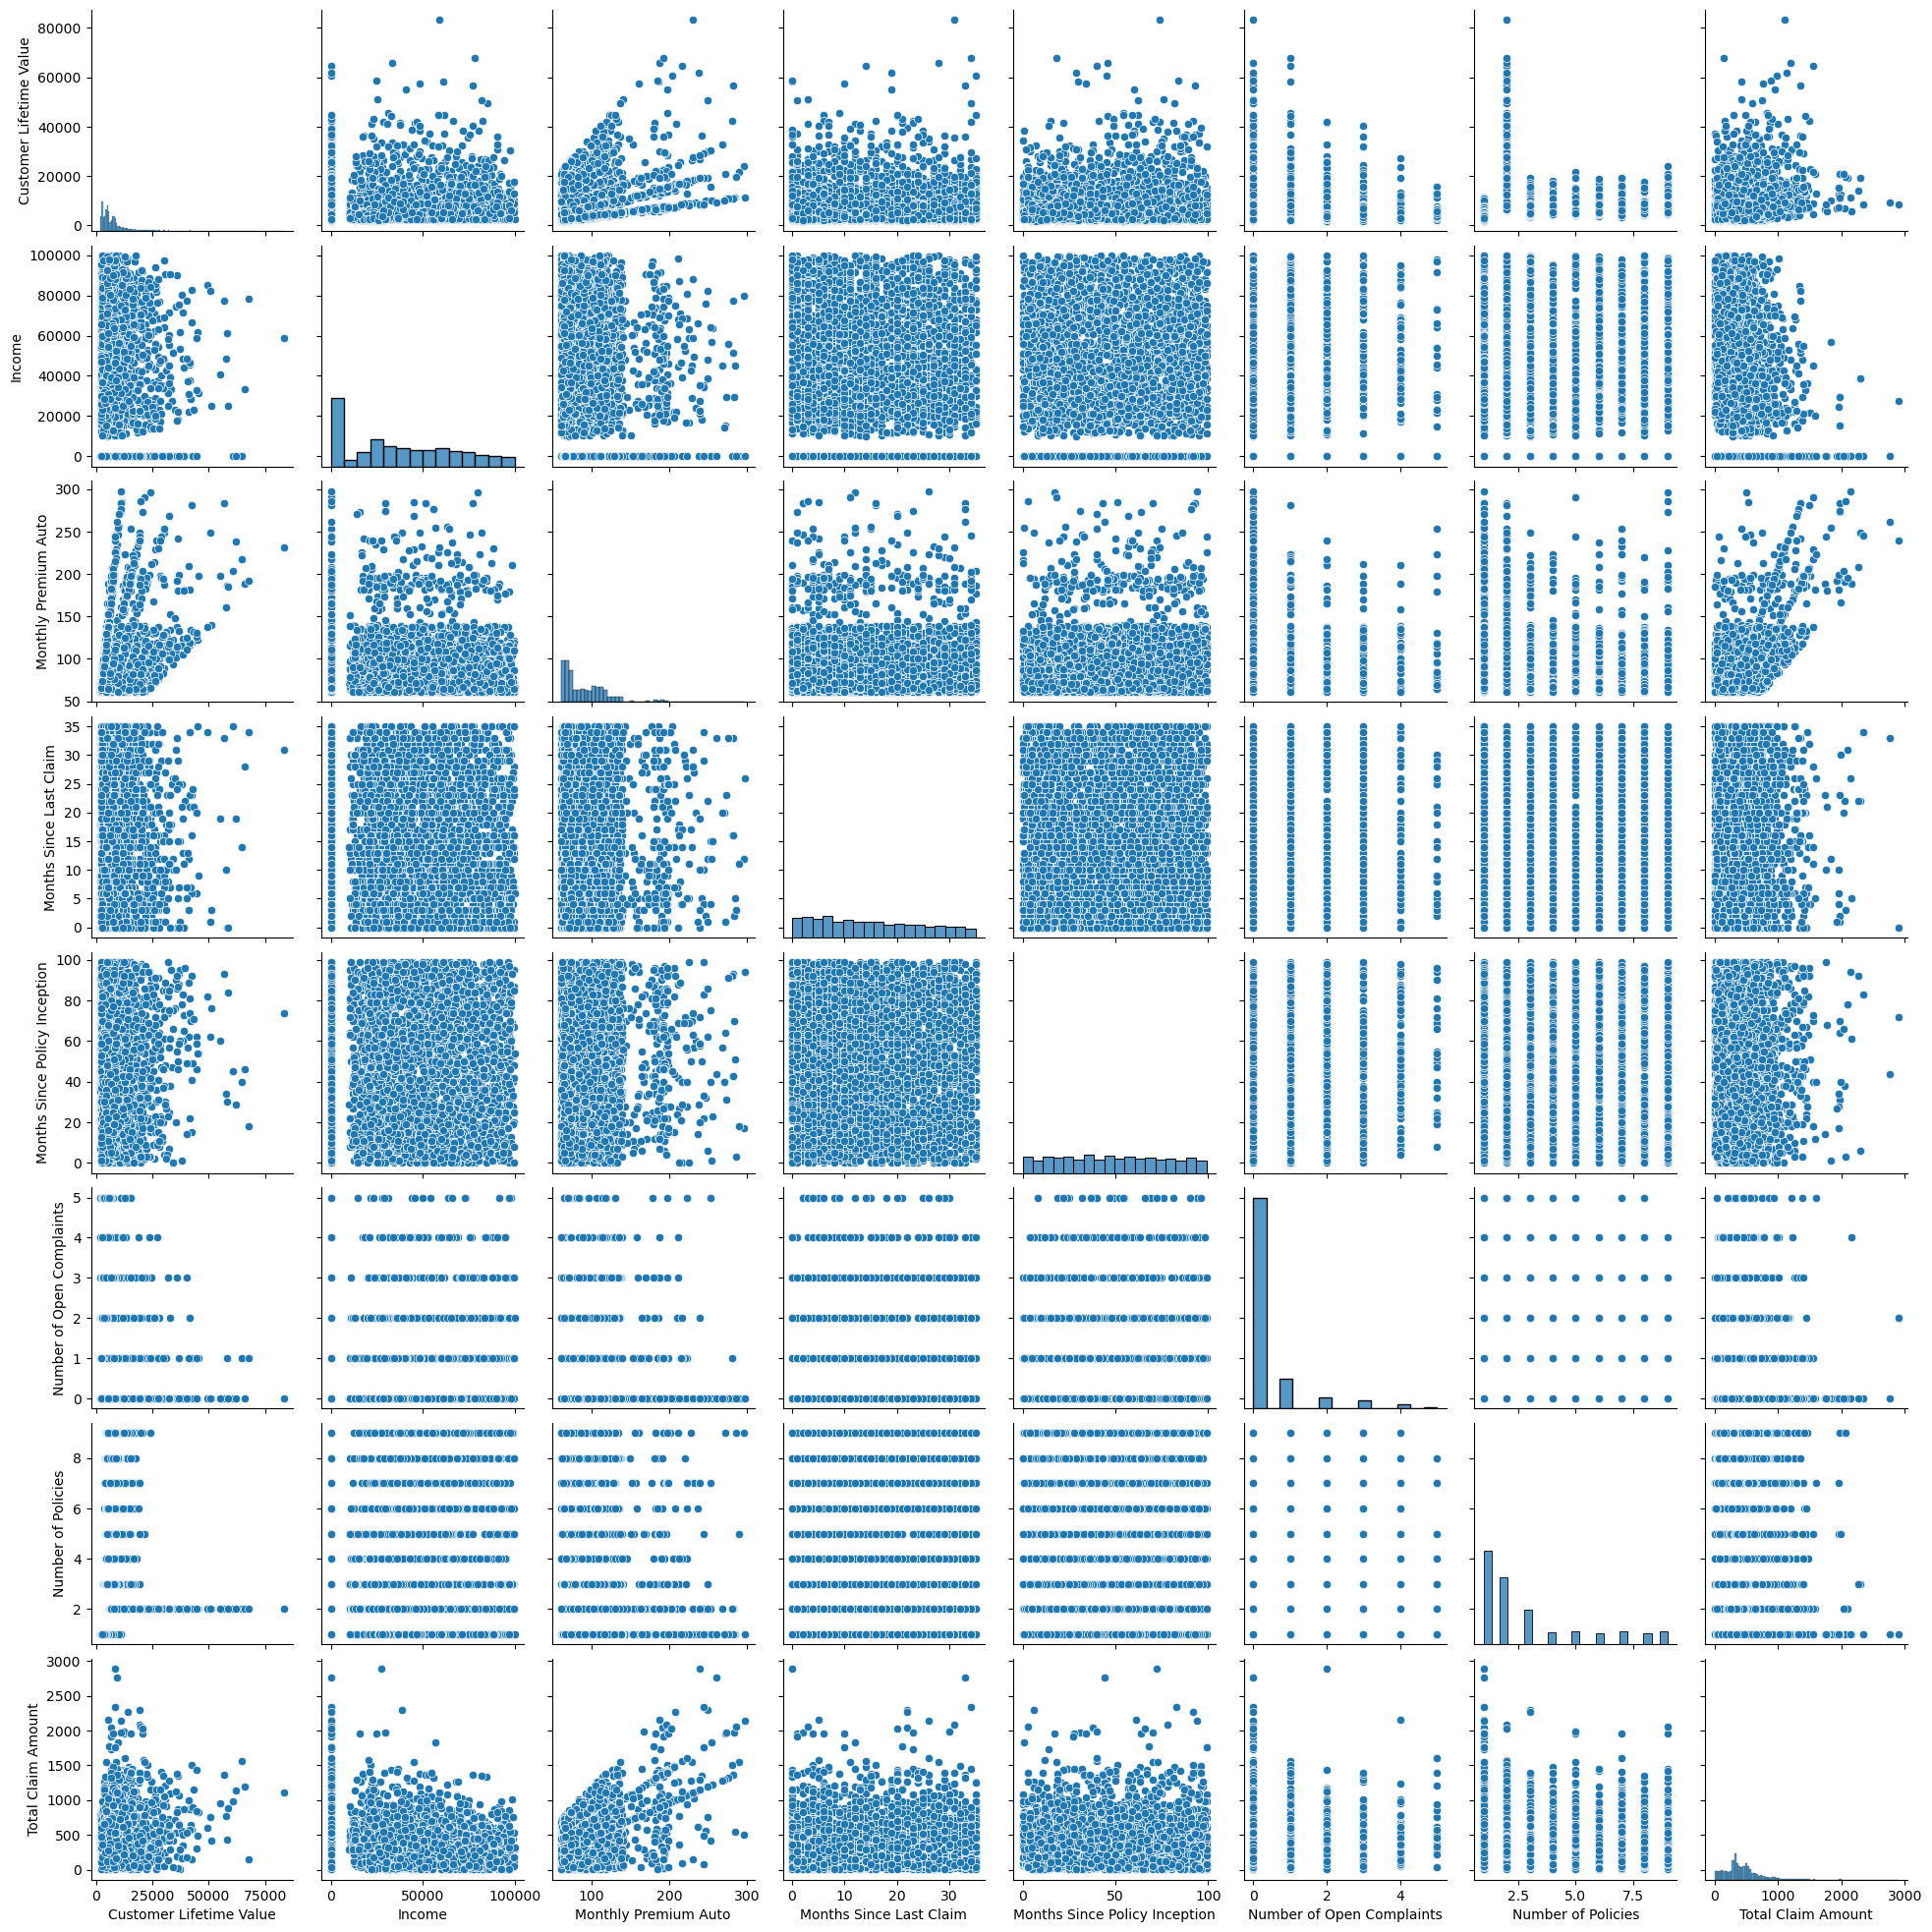

In [22]:
sns.pairplot(numerical)

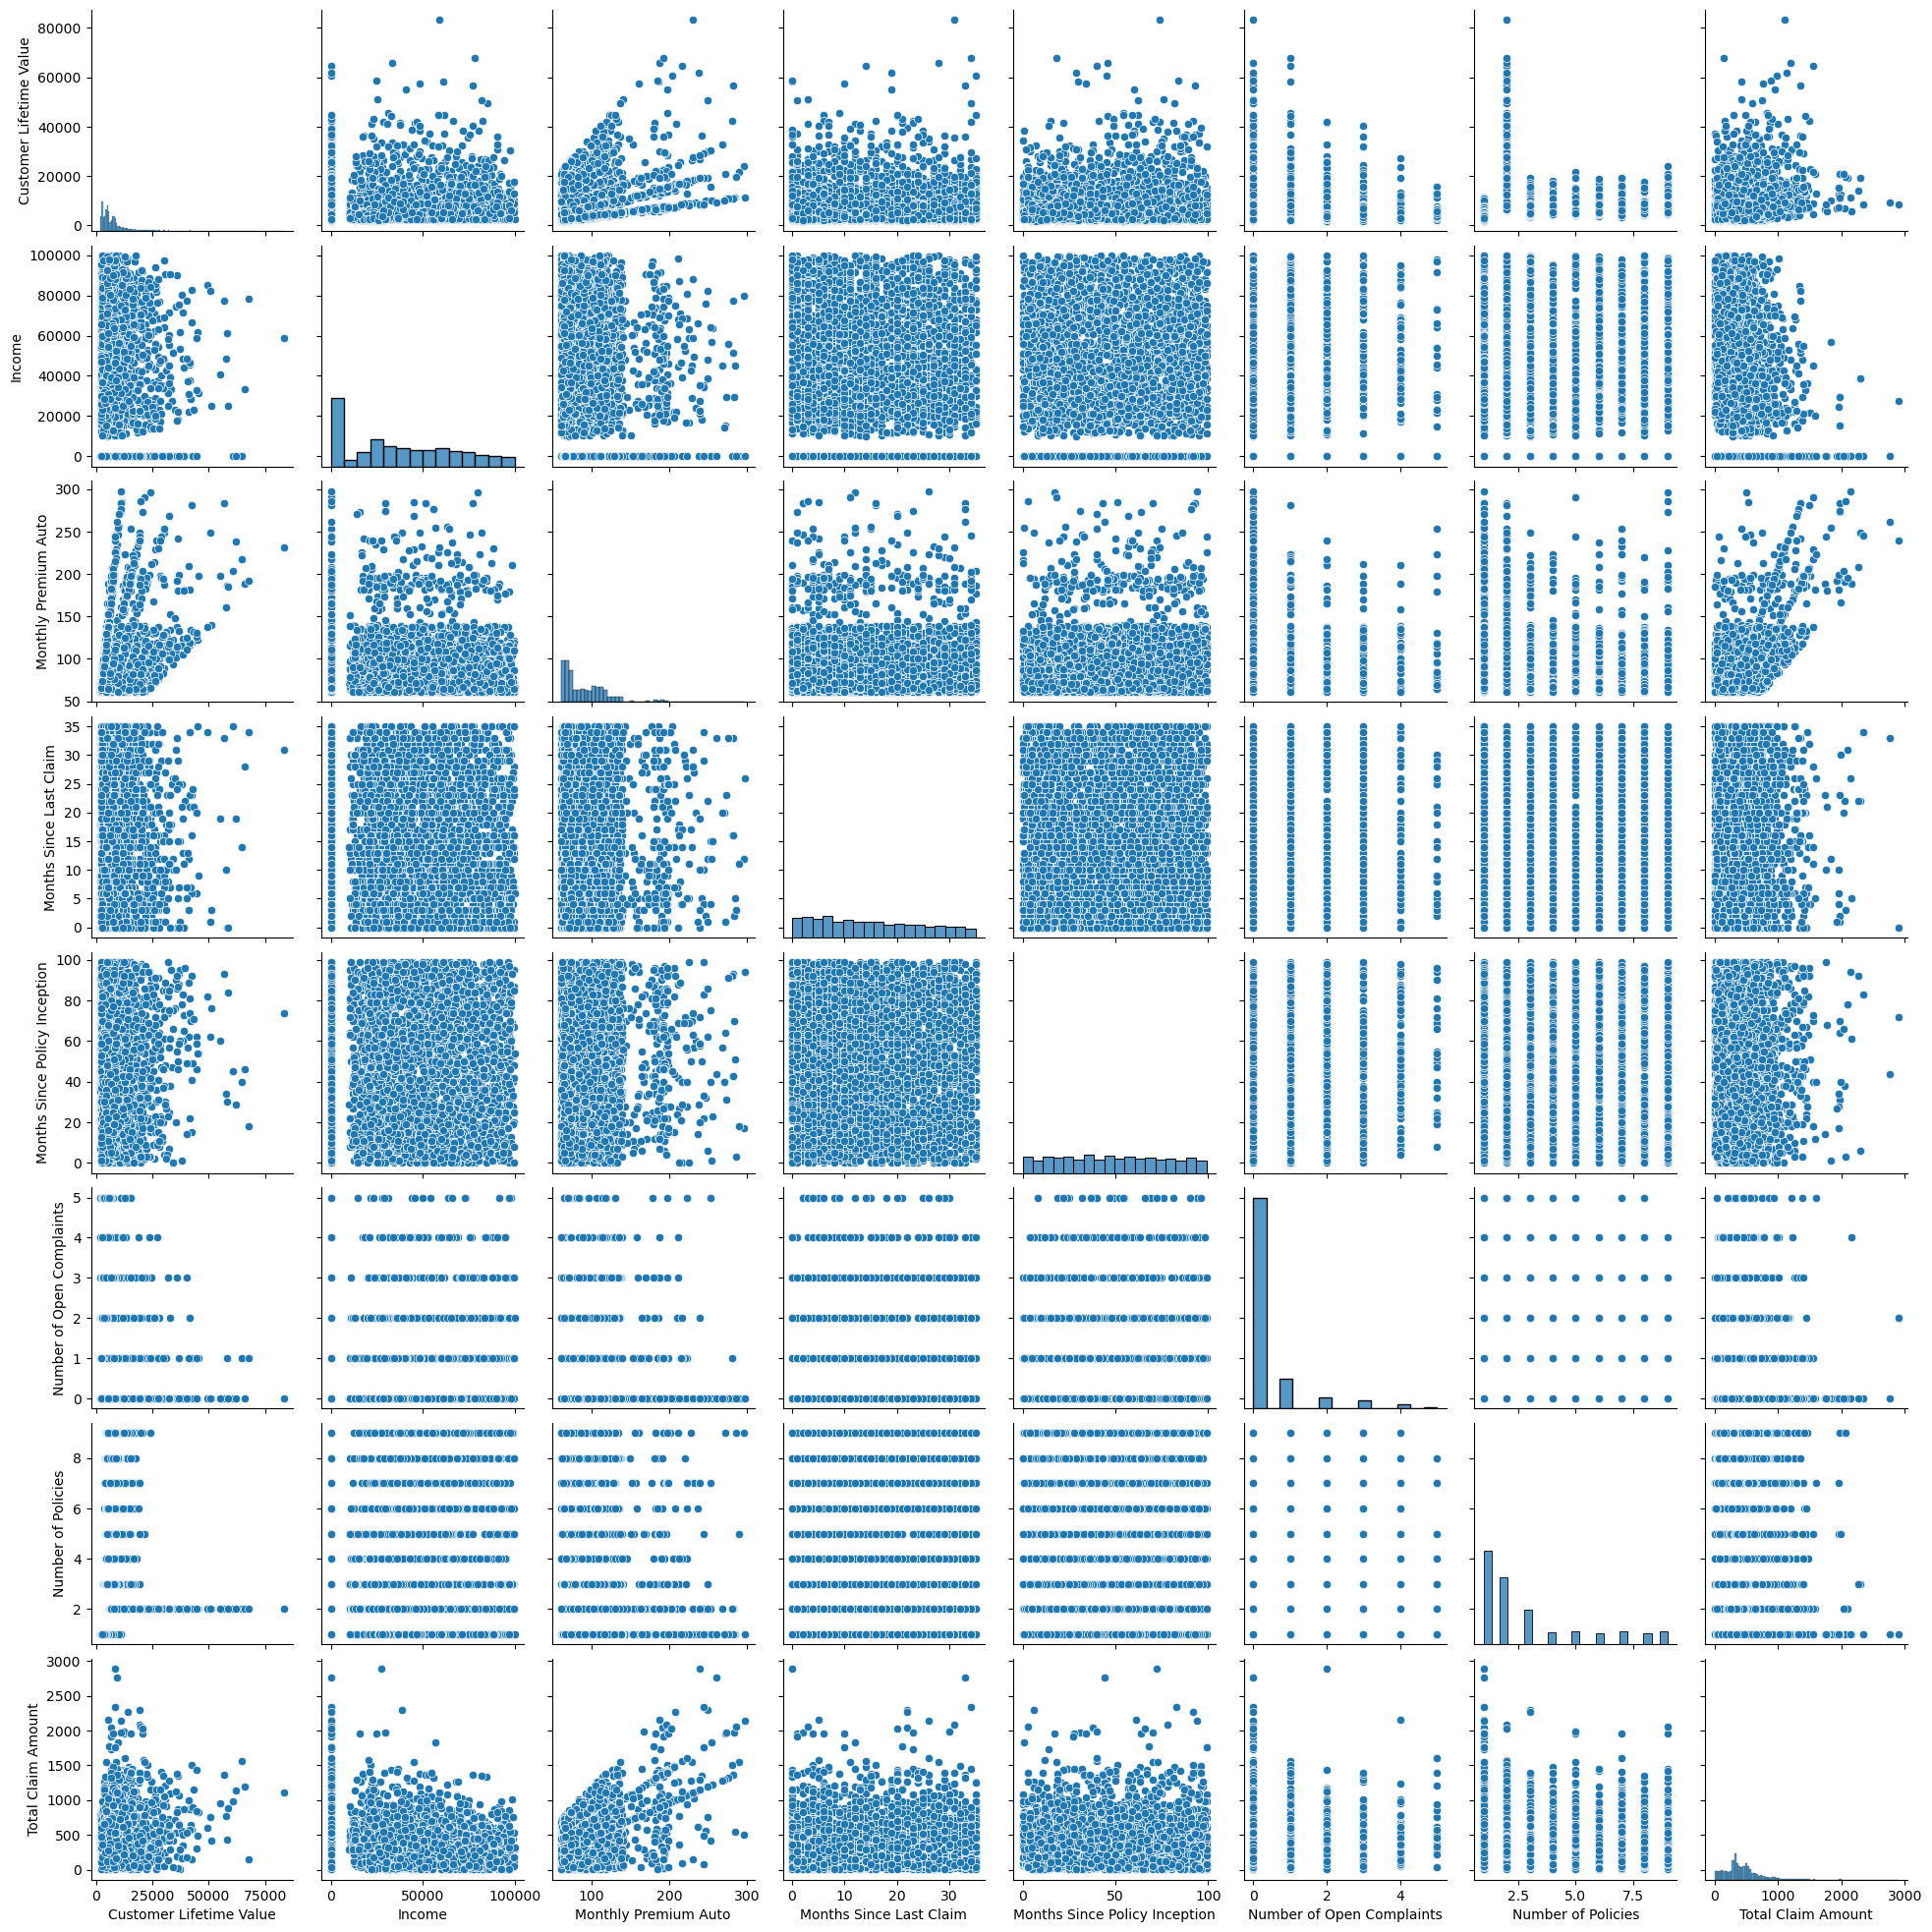

In [23]:
sns.pairplot(dataset)


In [24]:
numerical_features = numerical.drop(['Total Claim Amount'],axis=1)
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical_features)
x_standard = transformer.transform(numerical_features)
print(x_standard)

[[ 0.99359654 -0.50618094  0.17745107 ... -0.60950757 -0.42570647
  -0.41010408]
 [ 2.05477964  0.38424473  0.09195614 ... -1.60439787 -0.42570647
  -0.41010408]
 [-0.41371574  1.49655791  0.94690548 ... -0.60950757 -0.42570647
  -0.82849682]
 ...
 [ 1.60872685 -1.23795027  2.65680415 ... -0.57397577 -0.42570647
  -0.41010408]
 [-0.39867273  0.78313322 -0.81998982 ...  0.7051689  -0.42570647
   1.26346686]
 [ 0.56594302  0.88391305  1.83035312 ... -0.75163476  3.98223539
   1.26346686]]


In [25]:
## Linear regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [27]:
def r2(y, y_pred):
    return r2_score(y, y_pred)
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
    return (rmse)
def mse(y, y_pred):
    return mean_squared_error(y, y_pred) 
def mae(y, y_pred):
    return mean_absolute_error(y, y_pred) 
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [28]:
numerical_columns = dataset.select_dtypes(exclude=['object']).columns.tolist()
categorical = dataset.drop(numerical_columns, axis=1)
categorical

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,HG93801,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,KR82385,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,FH51383,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
10903,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


In [29]:
dataset.info()
dataset.dtypes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       4543 non-null   object 
 1   State                          4543 non-null   object 
 2   Customer Lifetime Value        4543 non-null   float64
 3   Response                       4543 non-null   object 
 4   Coverage                       4543 non-null   object 
 5   Education                      4543 non-null   object 
 6   Effective To Date              4543 non-null   object 
 7   EmploymentStatus               4543 non-null   object 
 8   Gender                         4543 non-null   object 
 9   Income                         4543 non-null   int64  
 10  Location Code                  4543 non-null   object 
 11  Marital Status                 4543 non-null   object 
 12  Monthly Premium Auto           4543 non-null   

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

In [30]:
categorical=dataset.select_dtypes('object')
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,HG93801,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,KR82385,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,FH51383,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A


In [31]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer           4543 non-null   object
 1   State              4543 non-null   object
 2   Response           4543 non-null   object
 3   Coverage           4543 non-null   object
 4   Education          4543 non-null   object
 5   Effective To Date  4543 non-null   object
 6   EmploymentStatus   4543 non-null   object
 7   Gender             4543 non-null   object
 8   Location Code      4543 non-null   object
 9   Marital Status     4543 non-null   object
 10  Policy Type        4543 non-null   object
 11  Policy             4543 non-null   object
 12  Renew Offer Type   4543 non-null   object
 13  Sales Channel      4543 non-null   object
 14  Vehicle Class      4543 non-null   object
 15  Vehicle Size       4543 non-null   object
 16  Vehicle Type       4543 non-null   object

In [32]:
print(dataset.shape)
print(numerical.shape)
print(categorical.shape)

(4543, 25)
(4543, 8)
(4543, 17)


# Model validation

In [33]:
#model validation

dataset.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A


In [34]:
dataset.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [35]:
dataset.shape

(4543, 25)

### ROUND 5

In [36]:
Y=dataset["Total Claim Amount"]
X=dataset.drop(["Total Claim Amount"],axis=1)

X.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,31,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,...,25,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,...,10,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A


In [37]:
from sklearn.preprocessing import StandardScaler


## Standard Scaler

In [38]:
# Iniciatinf Standard Scaler

sc_X = StandardScaler()


In [39]:
#Selecting numerical and categoricals columns

X_num_std = X.select_dtypes(include=np.number)


X_cat_enco = X.select_dtypes(include=np.object)

In [40]:
X_num_std = sc_X.fit_transform(X_num_std)


In [41]:
numerical_columns

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [42]:
X_num_std = pd.DataFrame(X_num_std, columns= ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies'])


In [43]:
X_num_std

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.993597,-0.506181,0.177451,1.859657,-0.609508,-0.425706,-0.410104
1,2.054780,0.384245,0.091956,-0.503290,-1.604398,-0.425706,-0.410104
2,-0.413716,1.496558,0.946905,-0.207922,-0.609508,-0.425706,-0.828497
3,-0.370630,0.954614,-0.705997,0.973552,-0.822698,-0.425706,0.426681
4,-0.389011,1.297808,-0.791492,1.072008,-1.355675,-0.425706,1.263467
...,...,...,...,...,...,...,...
4538,-0.640155,-0.302407,-0.079034,-0.503290,-0.645039,1.778264,-0.828497
4539,-0.756176,0.740461,-0.563505,1.465833,1.202614,3.982235,-0.828497
4540,1.608727,-1.237950,2.656804,-0.109466,-0.573976,-0.425706,-0.410104
4541,-0.398673,0.783133,-0.819990,-0.798659,0.705169,-0.425706,1.263467


In [44]:
X_num_std.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'],
      dtype='object')

In [45]:
X_num_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543 entries, 0 to 4542
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        4543 non-null   float64
 1   Income                         4543 non-null   float64
 2   Monthly Premium Auto           4543 non-null   float64
 3   Months Since Last Claim        4543 non-null   float64
 4   Months Since Policy Inception  4543 non-null   float64
 5   Number of Open Complaints      4543 non-null   float64
 6   Number of Policies             4543 non-null   float64
dtypes: float64(7)
memory usage: 248.6 KB


In [46]:
X_num_std.shape

(4543, 7)

In [47]:
X_num_std.apply(lambda col:pd.to_numeric(col, errors='coerce'))

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.993597,-0.506181,0.177451,1.859657,-0.609508,-0.425706,-0.410104
1,2.054780,0.384245,0.091956,-0.503290,-1.604398,-0.425706,-0.410104
2,-0.413716,1.496558,0.946905,-0.207922,-0.609508,-0.425706,-0.828497
3,-0.370630,0.954614,-0.705997,0.973552,-0.822698,-0.425706,0.426681
4,-0.389011,1.297808,-0.791492,1.072008,-1.355675,-0.425706,1.263467
...,...,...,...,...,...,...,...
4538,-0.640155,-0.302407,-0.079034,-0.503290,-0.645039,1.778264,-0.828497
4539,-0.756176,0.740461,-0.563505,1.465833,1.202614,3.982235,-0.828497
4540,1.608727,-1.237950,2.656804,-0.109466,-0.573976,-0.425706,-0.410104
4541,-0.398673,0.783133,-0.819990,-0.798659,0.705169,-0.425706,1.263467


## ROUND 6

In [48]:
from sklearn.preprocessing import OneHotEncoder


In [49]:
drop_enc = OneHotEncoder(drop='first').fit(X_cat_enco)


In [50]:
X_cat_enco = drop_enc.transform(X_cat_enco).toarray()


In [51]:
X_cat_enco.shape


(4543, 4643)

In [52]:
X_cat_enco = pd.DataFrame(X_cat_enco)

concat = pd.concat([X.select_dtypes(include=['float64','int64']), X_cat_enco], axis=1)

In [53]:
concat.columns = concat.columns.astype(str)
concat = sc_X.fit_transform(concat)

In [54]:
#normalize concat
concat = sc_X.fit_transform(concat)

In [55]:
concat

array([[ 0.99359654, -0.50618094,  0.17745107, ..., -0.5073498 ,
        -1.53306718, -0.48599432],
       [ 2.05477964,  0.38424473,  0.09195614, ...,  1.9710267 ,
         0.65228713, -0.48599432],
       [-0.41371574,  1.49655791,  0.94690548, ..., -0.5073498 ,
         0.65228713, -0.48599432],
       ...,
       [        nan,         nan,         nan, ..., -0.5073498 ,
         0.65228713, -0.48599432],
       [        nan,         nan,         nan, ..., -0.5073498 ,
         0.65228713, -0.48599432],
       [        nan,         nan,         nan, ..., -0.5073498 ,
         0.65228713, -0.48599432]])

In [56]:
print(X_num_std.columns)

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'],
      dtype='object')


In [57]:
## LINEAR REGRESSION MODEL

In [58]:
from sklearn.model_selection import train_test_split

# Assume that your dataframe is called "df"
X = X_num_std.drop(["Customer Lifetime Value"], axis=1) 
y = X_num_std["Customer Lifetime Value"] 


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [61]:
## PREPARING THE LINEAR REGRESSION MODEL
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)


In [62]:
X_test = sc_x.transform(X_test)


In [63]:
X_train


array([[-6.48986138e-04,  4.99335928e-01, -1.20400591e+00,
        -9.50171142e-01,  2.81052210e+00,  4.20541768e-03],
       [ 6.95183000e-01,  4.43590233e-01, -9.09661128e-01,
         5.04250985e-01, -4.28861836e-01, -8.31621346e-01],
       [-5.14042068e-01, -2.53230956e-01,  1.44509711e+00,
         1.84987591e-01, -4.28861836e-01, -8.31621346e-01],
       ...,
       [-5.08642114e-01, -8.94306449e-01,  1.83755682e+00,
         1.32014632e+00, -4.28861836e-01, -8.31621346e-01],
       [ 7.43020620e-01,  1.36988910e-01, -3.20971567e-01,
        -7.01855169e-01, -4.28861836e-01, -8.31621346e-01],
       [ 6.94520429e-01, -1.69612413e-01, -1.10589098e+00,
         1.24919890e+00, -4.28861836e-01, -8.31621346e-01]])

In [64]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression()

In [65]:
print(regressor.coef_)
print(regressor.intercept_)


[ 0.02141837  0.44541997  0.03405584  0.01667824 -0.0404735   0.01244051]
0.031002359282499548
